<a href="https://colab.research.google.com/github/MUXULCRACK/Challenge2_Data_Science/blob/main/TelecomX_LATAMnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🔄 Importar libreria**

In [ ]:
import pandas as pd

#**📌 Extracción**

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
import json
import pandas as pd

with open('/content/TelecomX_Data.json', 'r') as f:
    data = json.load(f)  # data es una lista de registros completos


In [ ]:
df_T =  pd.read_json('/content/TelecomX_Data.json')
df_T.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_T = pd.json_normalize(df_T['customer'])

In [ ]:

df_T.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


#**🔧 Transformación**

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

##**Conoce el conjunto de datos**

In [ ]:
# Visión general con conteo y tipos
df_T.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Tipos exactos por columna

df_T.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:

# Vista rápida de registros
df_T.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##**Comprobación de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

###**Valores ausentes**

In [ ]:
df_T.select_dtypes(include='object').apply(lambda vacio: vacio.eq('').sum() + vacio.str.isspace().sum()),

(customerID      0.0
 Churn         224.0
 customer        0.0
 phone           0.0
 internet        0.0
 account         0.0
 dtype: float64,)

In [ ]:
df_T.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
df_T.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


###**Revision de datos duplicados en el ID**

In [ ]:
# Revisar si hay datos duplicados
print("Duplicados en'customerID':")
print(df_T.duplicated(subset=['customerID']).sum())

Duplicados en'customerID':
0


###**Revision de de errores de formato e inconsistencia de categorias**

In [ ]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##**Manejo de inconsistencias**

cambiamos a string la columna Churn

In [ ]:
df_T['Churn'] = df_T['Churn'].astype('string')
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   string
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(5), string(1)
memory usage: 340.8+ KB


Aqui realizamos en la columna customer un cambio el cual quita comillas simples, las llaves del texto y pone en minusculas


In [ ]:
df_T['customer'] = df_T['customer'].astype(str)
df_T['customer'] = df_T['customer'].str.replace(r"[{}']", "", regex=True ).str.lower()


In [ ]:
df_T.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"gender: female, seniorcitizen: 0, partner: yes...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"gender: male, seniorcitizen: 0, partner: no, d...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"gender: male, seniorcitizen: 0, partner: no, d...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"gender: male, seniorcitizen: 1, partner: yes, ...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"gender: female, seniorcitizen: 1, partner: yes...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


aqui para las siguientes columnas

In [ ]:
cols = [ 'phone', 'internet', 'account']

for col in cols:
    # 1. Asegurar que sea string
    df_T[col] = df_T[col].astype(str)
    # 2. Reemplazar llaves y comillas simples
    df_T[col] = df_T[col].str.replace(r"[{}']", "", regex=True).str.lower()


In [ ]:
df_T.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"gender: female, seniorcitizen: 0, partner: yes...","phoneservice: yes, multiplelines: no","internetservice: dsl, onlinesecurity: no, onli...","contract: one year, paperlessbilling: yes, pay..."
1,0003-MKNFE,No,"gender: male, seniorcitizen: 0, partner: no, d...","phoneservice: yes, multiplelines: yes","internetservice: dsl, onlinesecurity: no, onli...","contract: month-to-month, paperlessbilling: no..."
2,0004-TLHLJ,Yes,"gender: male, seniorcitizen: 0, partner: no, d...","phoneservice: yes, multiplelines: no","internetservice: fiber optic, onlinesecurity: ...","contract: month-to-month, paperlessbilling: ye..."
3,0011-IGKFF,Yes,"gender: male, seniorcitizen: 1, partner: yes, ...","phoneservice: yes, multiplelines: no","internetservice: fiber optic, onlinesecurity: ...","contract: month-to-month, paperlessbilling: ye..."
4,0013-EXCHZ,Yes,"gender: female, seniorcitizen: 1, partner: yes...","phoneservice: yes, multiplelines: no","internetservice: fiber optic, onlinesecurity: ...","contract: month-to-month, paperlessbilling: ye..."


In [ ]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   string
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(5), string(1)
memory usage: 340.8+ KB


##**Columna de cuentas diarias**

In [ ]:
df_T['account'].head()

,account
0,"contract: one year, paperlessbilling: yes, pay..."
1,"contract: month-to-month, paperlessbilling: no..."
2,"contract: month-to-month, paperlessbilling: ye..."
3,"contract: month-to-month, paperlessbilling: ye..."
4,"contract: month-to-month, paperlessbilling: ye..."


Text(0, 0.5, 'Clientes')

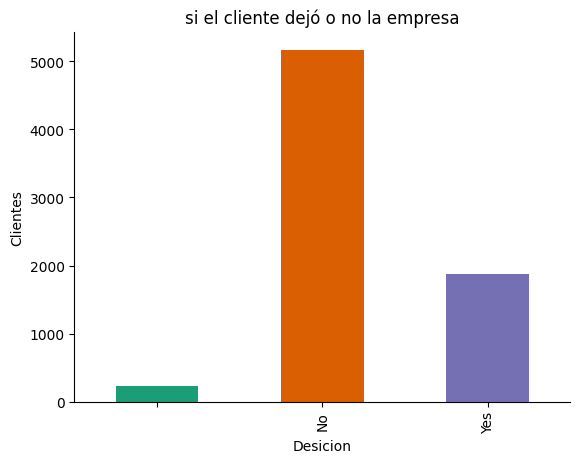

In [ ]:
# @title Churn

from matplotlib import pyplot as plt
import seaborn as sns
df_T.groupby('Churn').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('si el cliente dejó o no la empresa')
plt.xlabel('Desicion')
plt.ylabel('Clientes')

#**📊 Carga y análisis**

#📄Informe final